In [16]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Sigmoid Function
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

In [62]:
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures, NumberOfHiddenLayers):
	W = np.array([])
	b = np.array([])

	W = np.append(W, np.array([np.random.randn(neuronsInHiddenLayers, inputFeatures)]))
	b = np.append(b, np.zeros((neuronsInHiddenLayers, 1)))

	for i in range(NumberOfHiddenLayers - 2):
		W = np.append(W, np.array([np.random.randn(neuronsInHiddenLayers, neuronsInHiddenLayers)]))
		b = np.append(b, np.zeros((neuronsInHiddenLayers, 1)))

	W = np.append(W, np.array([np.random.randn(outputFeatures, neuronsInHiddenLayers)]))
	b = np.append(b, np.zeros((neuronsInHiddenLayers, 1)))
	
	
	parameters = {"W" : W, 'b' : b}
	return parameters

In [63]:

# Forward Propagation
def forwardPropagation(X, Y, parameters, NumberOfHiddenLayers):
	m = X.shape[1]
	W = parameters['W']
	b = parameters["b"]
	A = np.array([])

	Z = np.array([])
	Z = np.append(Z, np.dot(W[0], X) + b[0])
	A = np.append(A, sigmoid(Z[0]))

	for i in range(NumberOfHiddenLayers-2):
		Z = np.append(Z, np.dot(W[i+1], A[i]) + b[i+1])
		A = A = np.append(A, sigmoid(Z[i+1]))
	
	Z = np.append(Z, np.dot(W[NumberOfHiddenLayers-1], A[NumberOfHiddenLayers - 2]) + b[NumberOfHiddenLayers - 2])
	A = np.append(A, sigmoid(Z[NumberOfHiddenLayers-1]))

	cache = (Z, A, W, b)
	logprobs = np.multiply(np.log(A[NumberOfHiddenLayers-1]), Y) + np.multiply(np.log(1 - A[NumberOfHiddenLayers-1]), (1 - Y))
	cost = -np.sum(logprobs) / m
	return cost, cache, A

In [64]:
# Backward Propagation
def backwardPropagation(X, Y, cache, NumberOfHiddenLayers):
	m = X.shape[1]
	(Z, A, W, b) = cache

	dZ = np.zeros((NumberOfHiddenLayers, X.shape[1]))
	dW = np.zeros((NumberOfHiddenLayers, X.shape[1]))
	dA = np.zeros((NumberOfHiddenLayers, X.shape[1]))
	db = np.zeros((NumberOfHiddenLayers, X.shape[1]))

	dZ[NumberOfHiddenLayers-1] = A[NumberOfHiddenLayers-1] - Y
	dW[NumberOfHiddenLayers-1] = np.dot(dZ[NumberOfHiddenLayers-1], A[NumberOfHiddenLayers-1].T)
	dA[NumberOfHiddenLayers-2] = np.dot(dW[NumberOfHiddenLayers-1].T, dZ[NumberOfHiddenLayers-1])

	for i in range(NumberOfHiddenLayers-2):
		dA[NumberOfHiddenLayers-i-2] = np.dot(W[NumberOfHiddenLayers-i-1].T, dZ[NumberOfHiddenLayers-i-1])
		dZ[NumberOfHiddenLayers-i-2] = np.multiply(dA[NumberOfHiddenLayers-i-2], A[NumberOfHiddenLayers-i-2]*(1 - A[NumberOfHiddenLayers-i-2]))
		dW[NumberOfHiddenLayers-i-2] = np.dot(dZ[NumberOfHiddenLayers-i-2], A[NumberOfHiddenLayers-i-2].T)
		db[NumberOfHiddenLayers-i-2] = np.sum(dZ[NumberOfHiddenLayers-i-2], axis = 0, keepdims = True) / m

	dA[0] = np.dot(W[1].T, dZ[NumberOfHiddenLayers-1])
	dZ[0] = np.multiply(dA[0], A[0] * (1- A[0]))
	dW[0] = np.dot(dZ[0], X.T) / m
	db[0] = np.sum(dZ[0], axis = 1, keepdims = True)
	
	gradients = {"dZ": dZ, "dW": dW, "db": db}
	return gradients

In [65]:
# Backward Propagation
def backwardPropagation(X, Y, cache, NumberOfHiddenLayers):
	m = X.shape[1]
	(Z, A, W, b) = cache

	dZ = np.array([])
	dW = np.array([])
	dA = np.array([])
	db = np.array([])

	dZ = np.append(dZ, A[NumberOfHiddenLayers-1] - Y)
	dW = np.append(dW, np.dot(dZ[0], A[NumberOfHiddenLayers-1].T))
	dA = np.append(dA, np.dot(dW[0].T, dZ[0]))

	for i in range(NumberOfHiddenLayers-2):
		dA = np.append(dA, np.dot(W[NumberOfHiddenLayers-i-1].T, dZ[i]))
		dZ = np.append(dZ, np.multiply(dA[i], A[NumberOfHiddenLayers-i-2]*(1 - A[NumberOfHiddenLayers-i-2])))
		dW = np.append(dW, np.dot(dZ[i], A[NumberOfHiddenLayers-i-2].T))
		db = np.append(db, np.sum(dZ[i], axis = 0, keepdims = True) / m)

	dA = np.append(dA, np.dot(W[1].T, dZ[NumberOfHiddenLayers-2]))
	dZ = np.append(dZ, np.multiply(dA[NumberOfHiddenLayers-2], A[0] * (1- A[0])))
	dW = np.append(dW, np.dot(dZ[NumberOfHiddenLayers-1], X.T) / m)
	db = np.append(db, np.sum(dZ[NumberOfHiddenLayers-1], axis = 0, keepdims = True))
	
	gradients = {"dZ": dZ, "dW": dW, "db": db}
	return gradients

In [66]:
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate, NumberOfHiddenLayers):
	for i in range(NumberOfHiddenLayers):
		parameters["W"][i] = parameters["W"][i] - learningRate * gradients["dW"][NumberOfHiddenLayers-i-1]
		parameters["b"][i] = parameters["b"][i] - learningRate * gradients["db"][NumberOfHiddenLayers-i-2]
	return parameters

In [67]:
# Model to learn the OR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input
Y = np.array([[0, 1, 1, 1]]) # OR output

In [73]:
# Define model parameters
NumberOfHiddenLayers = 2
neuronsInHiddenLayers = 10 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures, NumberOfHiddenLayers)
epoch = 100
learningRate = 0.01
losses = np.zeros((epoch, 1))

In [74]:
print(parameters["W"])

[-1.99847964 -0.80286392 -0.60846921  0.43233914 -0.44713614 -0.06746499
 -0.80787831 -0.48390011 -0.77162063 -0.05579671 -0.05562263  0.21027831
  0.03152509  1.60426755  1.12169422  0.92877432 -0.63354442  1.44288578
 -1.47273548 -2.00368088  0.73296557  1.46944982  0.21536917 -0.13336688
 -0.2132482  -1.38656611 -0.02154377  1.18421478  0.81565956  1.77778637]


In [75]:

for i in range(epoch):
	losses[i, 0], cache, A_1 = forwardPropagation(X, Y, parameters, NumberOfHiddenLayers)
	gradients = backwardPropagation(X, Y, cache, NumberOfHiddenLayers)
	parameters = updateParameters(parameters, gradients, learningRate, NumberOfHiddenLayers)

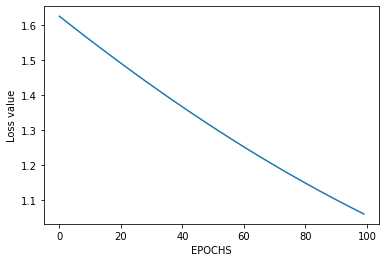

[0.27187343 0.27187343]
[0. 0.]


In [76]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # OR input
cost, _, A_1 = forwardPropagation(X, Y, parameters, NumberOfHiddenLayers)
prediction = (A_1 > 0.5) * 1.0
print(A_1)
print(prediction)


In [12]:
parameters

{'W': array([-2.34749570e+00,  1.22754753e+00,  2.03836324e-01,  1.56762168e+00,
         1.09806230e+00, -6.78933911e-01,  5.72854021e-01, -9.38390870e-01,
        -7.14890248e-01, -7.08936154e-01,  1.55983423e+00, -1.53232782e+00,
        -1.42930924e+00, -1.49114782e+00, -5.38850868e-01, -1.80355761e+00,
        -4.36985435e-01,  5.89098154e-02,  3.28169313e-01, -6.27149061e-01,
        -5.18885288e-03, -2.21690377e-01,  9.88271992e-03, -6.03271891e-01,
        -5.79093956e-01,  1.19203309e+00, -4.26463489e-01, -1.41473411e+00,
         8.23945246e-01,  1.29232855e+00, -8.40653106e-02, -1.35470875e+00,
         2.31434485e-01,  3.47092100e-01,  4.56525231e-02,  2.58256269e-01,
        -1.47756126e+00, -1.13328883e+00,  1.31618087e-01,  4.08589903e-01,
         1.04237195e+00,  2.86808123e-02, -3.65865284e-01, -1.54856525e-01,
         2.30326952e-01, -3.89473829e-02,  7.00552100e-01, -3.28089158e-01,
         1.54786890e+00, -1.11645729e-01,  7.33963284e-01, -1.28149546e+00,
       

In [13]:
losses[len(losses)-1]

array([0.67255239])